In [ ]:
import numpy as np

In [ ]:
!unzip /content/drive/MyDrive/archive.zip #Show Datset

Streaming output truncated to the last 5000 lines.
  inflating: train/5/00005_00053_00010.png  
  inflating: train/5/00005_00053_00011.png  
  inflating: train/5/00005_00053_00012.png  
  inflating: train/5/00005_00053_00013.png  
  inflating: train/5/00005_00053_00014.png  
  inflating: train/5/00005_00053_00015.png  
  inflating: train/5/00005_00053_00016.png  
  inflating: train/5/00005_00053_00017.png  
  inflating: train/5/00005_00053_00018.png  
  inflating: train/5/00005_00053_00019.png  
  inflating: train/5/00005_00053_00020.png  
  inflating: train/5/00005_00053_00021.png  
  inflating: train/5/00005_00053_00022.png  
  inflating: train/5/00005_00053_00023.png  
  inflating: train/5/00005_00053_00024.png  
  inflating: train/5/00005_00053_00025.png  
  inflating: train/5/00005_00053_00026.png  
  inflating: train/5/00005_00053_00027.png  
  inflating: train/5/00005_00053_00028.png  
  inflating: train/5/00005_00053_00029.png  
  inflating: train/5/00005_00054_00000.png  
  in

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf 
from PIL import Image
import os 
from sklearn.model_selection import train_test_split 
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout #Important Libs

In [ ]:
data = []
labels = []
classes = 43 
cur_path = os.getcwd() 

In [ ]:
for i in range(classes): 
  path = os. path.join(cur_path,'train', str(i)) 
  print(path)
  images = os.listdir(path) 
  for a in images: 
      image = Image.open(path + '/'+ a) 
      image = image.resize((30,30)) 
      image = np.array(image) 
      data.append(image) 
      labels.append(i) 
data = np.array(data)
labels = np.array(labels)

/content/train/0
/content/train/1
/content/train/2
/content/train/3
/content/train/4
/content/train/5
/content/train/6
/content/train/7
/content/train/8
/content/train/9
/content/train/10
/content/train/11
/content/train/12
/content/train/13
/content/train/14
/content/train/15
/content/train/16
/content/train/17
/content/train/18
/content/train/19
/content/train/20
/content/train/21
/content/train/22
/content/train/23
/content/train/24
/content/train/25
/content/train/26
/content/train/27
/content/train/28
/content/train/29
/content/train/30
/content/train/31
/content/train/32
/content/train/33
/content/train/34
/content/train/35
/content/train/36
/content/train/37
/content/train/38
/content/train/39
/content/train/40
/content/train/41
/content/train/42


In [ ]:
print(data.shape, labels.shape)
#Splitting training and testing dataset
X_t1, X_t2, y_t1, y_t2 = train_test_split(data, labels, test_size=0.2, random_state=42)
print(X_t1.shape, X_t2.shape, y_t1.shape, y_t2.shape)

(39209, 30, 30, 3) (39209,)
(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [ ]:
#Converting the labels into one hot encoding
y_t1 = to_categorical(y_t1, 43)
y_t2 = to_categorical(y_t2, 43)

In [ ]:
#Building the model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_t1.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))
#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
eps = 15
anc = model.fit(X_t1, y_t1, batch_size=32, epochs=eps, validation_data=(X_t2, y_t2))


Epoch 1/15
981/981 [==============================] - 17s 5ms/step - loss: 1.7589 - accuracy: 0.5479 - val_loss: 0.3896 - val_accuracy: 0.9109
Epoch 2/15
981/981 [==============================] - 5s 5ms/step - loss: 0.5190 - accuracy: 0.8542 - val_loss: 0.1327 - val_accuracy: 0.9697
Epoch 3/15
981/981 [==============================] - 5s 5ms/step - loss: 0.3284 - accuracy: 0.9089 - val_loss: 0.1008 - val_accuracy: 0.9721
Epoch 4/15
981/981 [==============================] - 5s 5ms/step - loss: 0.2855 - accuracy: 0.9231 - val_loss: 0.1136 - val_accuracy: 0.9668
Epoch 5/15
981/981 [==============================] - 5s 5ms/step - loss: 0.2471 - accuracy: 0.9318 - val_loss: 0.0592 - val_accuracy: 0.9844
Epoch 6/15
981/981 [==============================] - 5s 5ms/step - loss: 0.2325 - accuracy: 0.9376 - val_loss: 0.0441 - val_accuracy: 0.9871
Epoch 7/15
981/981 [==============================] - 5s 5ms/step - loss: 0.2319 - accuracy: 0.9411 - val_loss: 0.0969 - val_accuracy: 0.9725
Epoch

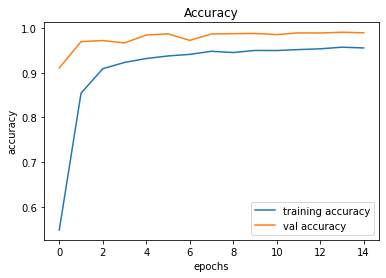

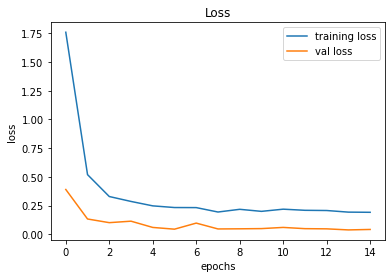

In [ ]:
#plotting graphs for accuracy
plt.figure(0)
plt.plot(anc.history['accuracy'], label='training accuracy')
plt.plot(anc.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()
plt.figure(1)
plt.plot(anc.history['loss'], label='training loss')
plt.plot(anc.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
model.save("traffic_classifier.h5")#to save